## Importing the relevant packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [38]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/8.%20ARIMA%20autorregresivo%20integrado%20de%20medias%20moviles/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [39]:
df_comp['market_value']=df_comp.ftse

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
#del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [42]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [43]:
df['returns'] = df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Sun, 10 Mar 2024   AIC                          55214.010
Time:                        22:02:07   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.866
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7459      0.059     12.653      0.000       0.630       0.861
ma.L1         -0.7919      0.053    -14.924      0.000      -0.896      -0.688
sigma2      3498.7750     40.933     85.476      0.000    3418.548    3579.002
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              3326.22
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals of the ARIMA(1,1,1)

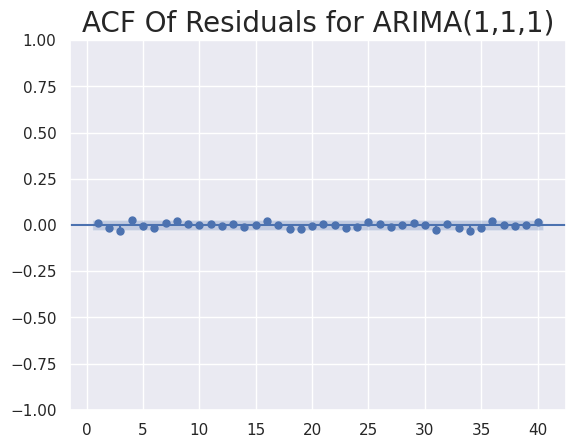

In [45]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

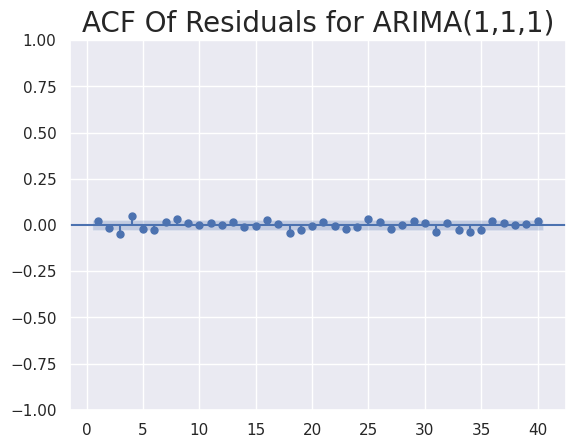

In [46]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

## Higher-Lag ARIMA Models

In [47]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [48]:
print("ARIMA(1,1,1):  \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27604.00511572735 	 AIC =  55214.0102314547
ARIMA(1,1,2):  	 LL =  -27600.40763254081 	 AIC =  55208.81526508162
ARIMA(1,1,3):  	 LL =  -27590.723481950256 	 AIC =  55191.44696390051
ARIMA(2,1,1):  	 LL =  -27600.130551053444 	 AIC =  55208.26110210689
ARIMA(3,1,1):  	 LL =  -27592.336116473074 	 AIC =  55194.67223294615
ARIMA(3,1,2):  	 LL =  -27590.920318056138 	 AIC =  55193.840636112276


In [49]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [50]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.0


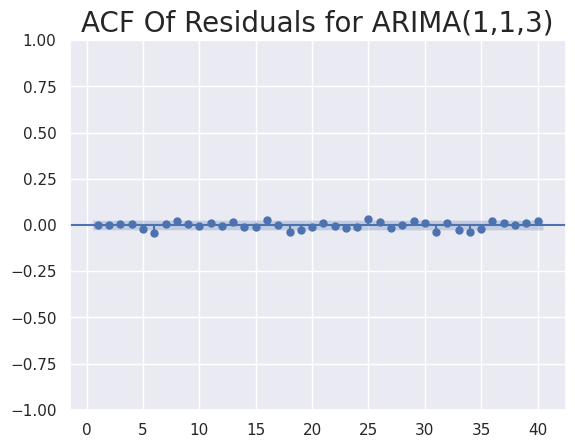

In [51]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size=20)
plt.show()

In [52]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit()
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit()

In [53]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.845
Date:                Sun, 10 Mar 2024   AIC                          55187.689
Time:                        22:02:15   BIC                          55233.338
Sample:                    01-07-1994   HQIC                         55203.685
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4006      0.153      2.618      0.009       0.101       0.701
ar.L2         -0.0444      0.011     -4.071      0.000      -0.066      -0.023
ar.L3         -0.0542      0.013     -4.226      0.000      -0.079      -0.029
ar.L4          0.0587      0.015      3.914      0.000       0.029       0.088
ar.L5         -0.0580      0.009     -6.337      0.000      -0.076      -0.040
ma.L1         -0.4208      0.153     -2.743      0.006      -0.721      -0.120
sigma2      3479.0027     41.909     83.013      0.000    3396.862    3561.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3060.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1):  \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)
print("ARIMA(6,1,3):  \t LL = ", results_ar_6_i_1_ma_3.llf, "\t AIC = ", results_ar_6_i_1_ma_3.aic)

ARIMA(1,1,3):  	 LL =  -27590.723481950256 	 AIC =  55191.44696390051
ARIMA(5,1,1):  	 LL =  -27586.84460959241 	 AIC =  55187.68921918482
ARIMA(6,1,3):  	 LL =  -27583.858499797476 	 AIC =  55187.71699959495


In [55]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_3, results_ar_6_i_1_ma_3, DF = 5)))


LLR test p-value = 0.017


In [56]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_5_i_1_ma_1, results_ar_6_i_1_ma_3, DF = 3)))


LLR test p-value = 0.113


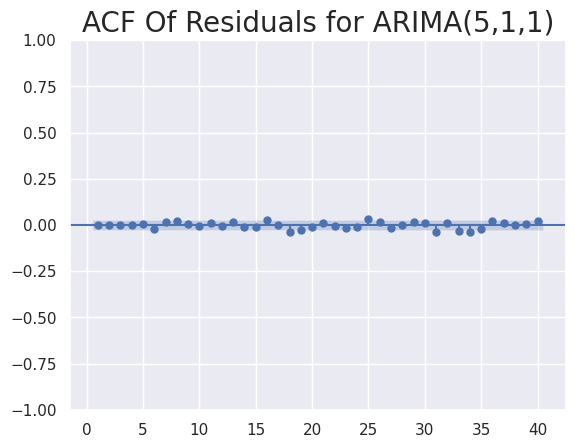

In [57]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,1)", size=20)
plt.show()

## Models with Higher Levels of Integration

In [58]:
df['delta_prices']=df.market_value.diff(1)

In [59]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27603.666
Date:                Sun, 10 Mar 2024   AIC                          55215.333
Time:                        22:02:17   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5639      0.753      0.749      0.454      -0.911       2.039
ar.L1          0.7476      0.059     12.673      0.000       0.632       0.863
ma.L1         -0.7937      0.053    -14.871      0.000      -0.898      -0.689
sigma2      3496.6352     41.191     84.888      0.000    3415.902    3577.368
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):              3327.38
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [62]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.177
Date:                Sun, 10 Mar 2024   AIC                          55234.353
Time:                        22:02:30   BIC                          55253.916
Sample:                    01-07-1994   HQIC                         55241.209
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0178      0.010     -1.808      0.071      -0.037       0.001
ma.L1         -1.0000      0.011    -90.493      0.000      -1.022      -0.978
sigma2      3513.2522     54.679     64.253      0.000    3406.084    3620.420
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3335.04
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

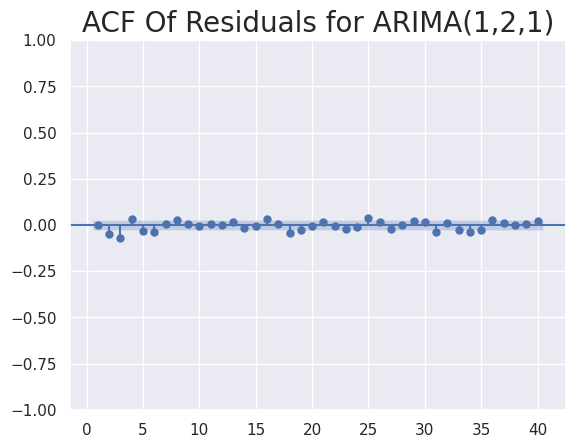

In [63]:
df['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_2_ma_1[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)",size=20)
plt.show()

## ARIMAX 

In [64]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26693.392
Date:                Sun, 10 Mar 2024   AIC                          53394.784
Time:                        22:02:31   BIC                          53420.869
Sample:                    01-07-1994   HQIC                         53403.925
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6928      0.035     76.407      0.000       2.624       2.762
ar.L1          0.2571      0.029      8.812      0.000       0.200       0.314
ma.L1         -0.5460      0.025    -21.791      0.000      -0.595      -0.497
sigma2      2433.0771     27.350     88.961      0.000    2379.472    2486.682
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              4423.90
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61406D+00    |proj g|=  3.31141D-01


 This problem is unconstrained.



At iterate    5    f=  5.36916D+00    |proj g|=  4.07136D-02

At iterate   10    f=  5.33449D+00    |proj g|=  8.82026D-03

At iterate   15    f=  5.32970D+00    |proj g|=  4.86553D-02

At iterate   20    f=  5.32286D+00    |proj g|=  8.95287D-04

At iterate   25    f=  5.32278D+00    |proj g|=  3.50500D-03

At iterate   30    f=  5.32136D+00    |proj g|=  7.18308D-03

At iterate   35    f=  5.32044D+00    |proj g|=  7.32611D-03

At iterate   40    f=  5.32016D+00    |proj g|=  1.47105D-03
  ys=-4.674E-05  -gs= 1.530E-05 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     73      1     1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.546
Date:                           Sun, 10 Mar 2024   AIC                          53439.092
Time:                                   22:02:46   BIC                          53484.742
Sample:                               01-07-1994   HQIC                         53455.088
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6961      0.035     76.021      0.000       2.627       2.766
ar.L1          0.9999      0.000   2831.173      0.000       0.999       1.001
ma.L1         -0.3086      0.009    -33.151      0.000      -0.327      -0.290
ar.S.L5        0.9665      0.009    105.412      0.000       0.949       0.984
ar.S.L10       0.0333      0.008      3.980      0.000       0.017       0.050
ma.S.L5       -0.9992      0.007   -147.737      0.000      -1.012      -0.986
sigma2      2441.6614     28.417     85.921      0.000    2385.964    2497.359
===================================================================================
Ljung-Box (L1) (Q):                   1.52   Jarque-Bera (JB):              4208.30
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""